In [1]:
import pandas as pd
import numpy as np
import math

import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns',100)
pd.set_option('display.max_rows',300)

from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

from sklearn.cluster import KMeans

In [2]:
#Reading the data into Country_data dta frame
Country_data=pd.read_csv("Country-data.csv")

In [3]:
#Copying the data into the Country data frame
Country=Country_data.copy()

In [4]:
Country.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


## Reading and Understanding Data

In [5]:
Country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 12.5+ KB


### Observations:
<font color='Green'><br>
- All the columns are properly formatted.
- There are no Null Values

In [6]:
Country.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [7]:
Country.shape

(167, 10)

### Observations:
<font color='Green'><br>
There are total 167 countries data with 10 parameters on which needs to clusterized the countries

In [8]:
Country.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


### Observations:
<font color='green'><br>
- It can be seen the the highest mortality rate  is 208. 
- It can be seen the total fertility maximum is 7.49
- These indicates that some countries needs to be taken into consideration for disaster or natural calamities.

In [9]:
#making export import and income in form of % of GDPP, Converting into original value.

In [10]:
Country['exports']=(Country['exports']/100)*Country['gdpp']

In [11]:
Country['health']=(Country['health']/100)*Country['gdpp']

In [12]:
Country['imports']=(Country['imports']/100)*Country['gdpp']

In [13]:
Country.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


## EDA

In [14]:
l=[ 'child_mort', 'imports', 'health','income','inflation', 'life_expec', 'total_fer', 'gdpp','exports']

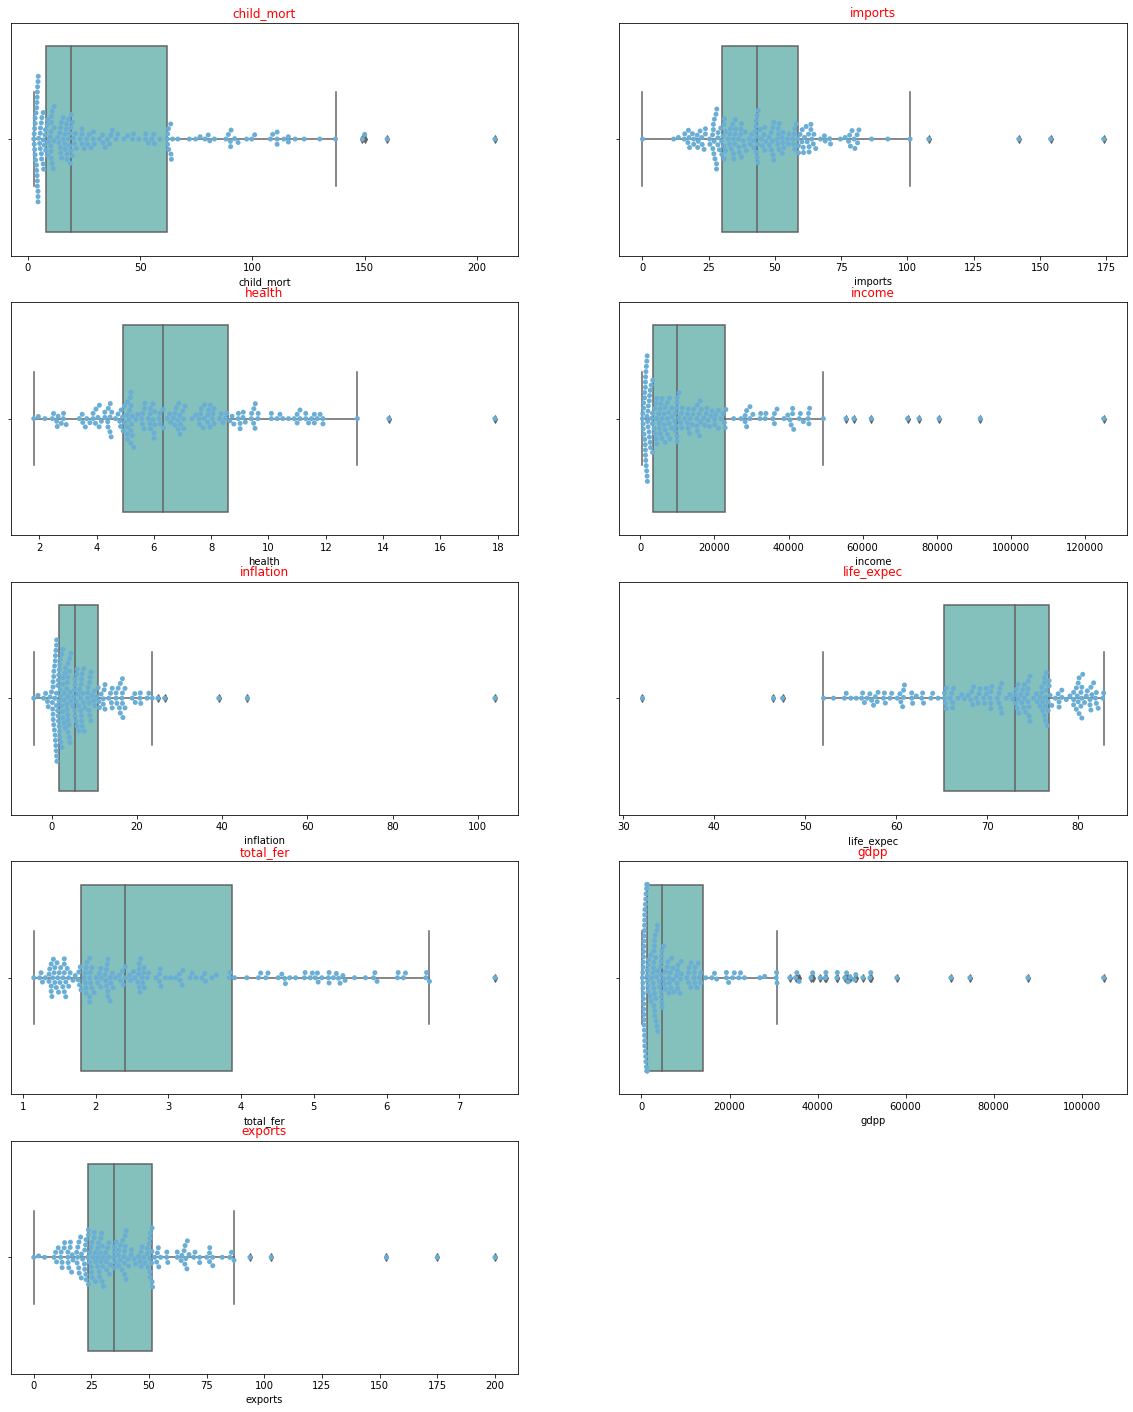

In [15]:
#Box Plot for Each parameters 
plt.figure(figsize=[20,30])
for i in enumerate(l):
        plt.subplot(6,2,i[0]+1)
        sns.boxplot(Country_data[i[1]],palette="GnBu")
        sns.swarmplot(Country_data[i[1]],palette="Blues")
        plt.title(i[1],color="r")
plt.show()

#### Observations:
<font color='Green'><br>
- Here we can see, we have outliers for almost all the features.<br>
- We can see outliers in child mort means there are few countries whose child mortality rate is much higher than others and hence it is really need aid in natural calamities.<br>
- In health some countries have outlier. That could mean they have good health conditions for each person and life expectancy relatively should be more.<br>
- In inflation it can be seen few countries are below 0 means the GDP comparative to inflations are not increased.
 


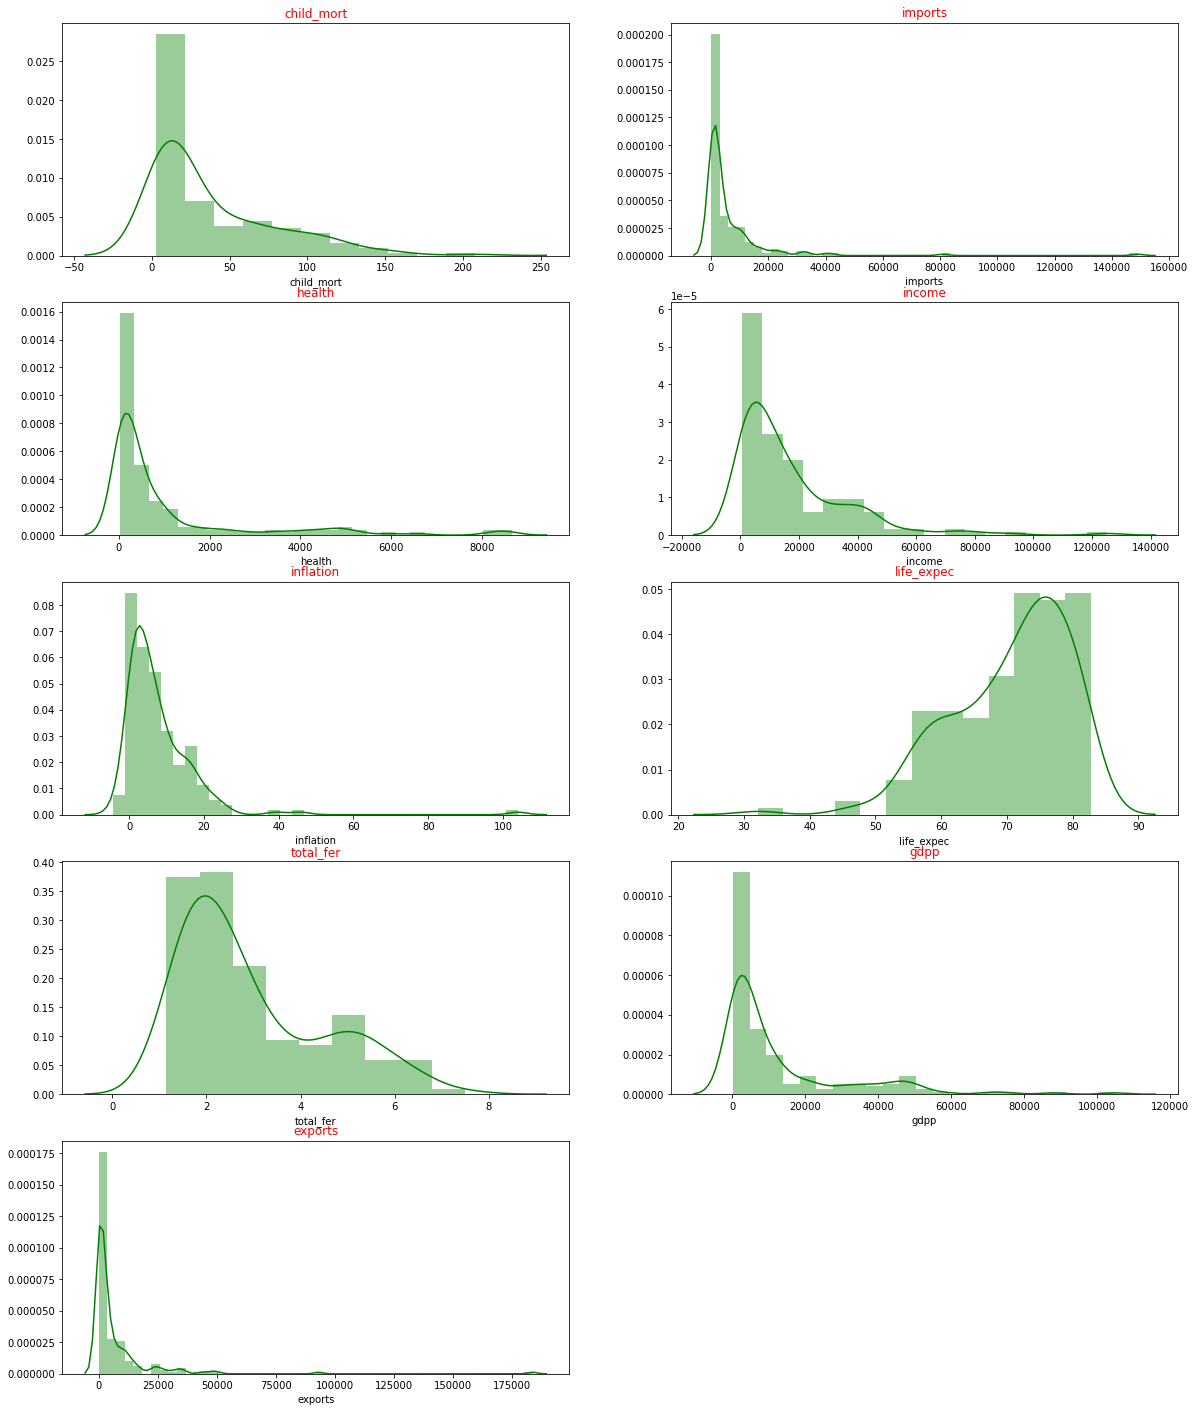

In [16]:
#DistPlot for each parameters
plt.figure(figsize=[20,30])
for i in enumerate(l):
        plt.subplot(6,2,i[0]+1)
        sns.distplot(Country[i[1]],color="g")
        plt.title(i[1],color="r")
plt.show()


### Observations:

<font color ='Green'><br>
- It can be seen that child mortality are in the range of 0-50 , but can also be observed that some countries have child mortality more than 100.
- It can be observed the gdpp mainly lie in three different ranges between 0 and 20k, 40k-60k and more than 70k.
- In Total fertility , It is observed that most of countries are in the average of 2.5 which i sgood indication of being developed but some countries have total fertility as more than 6 . So if countries belong to this needs attention in trms of health and other financial factors.
- Also in life expectancy , with low expectancy , it is required more focus. But on an average many countries have more life expectancy.

In [17]:
Country.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,7420.618847,1056.733204,6588.352108,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,17973.885795,1801.408906,14710.810418,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,1.076920,12.821200,0.651092,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,447.140000,78.535500,640.215000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,1777.440000,321.886000,2045.580000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,7278.000000,976.940000,7719.600000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,183750.000000,8663.600000,149100.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [18]:
Country['gdpp'].quantile([0.1,0.15,0.18,0.2,.3])

0.10     593.80
0.15     767.90
0.18     985.48
0.20    1146.00
0.30    2170.00
Name: gdpp, dtype: float64

### Analyzng the countries having GDPP< 800

In [19]:
df_gdp=Country[Country['gdpp']<800]

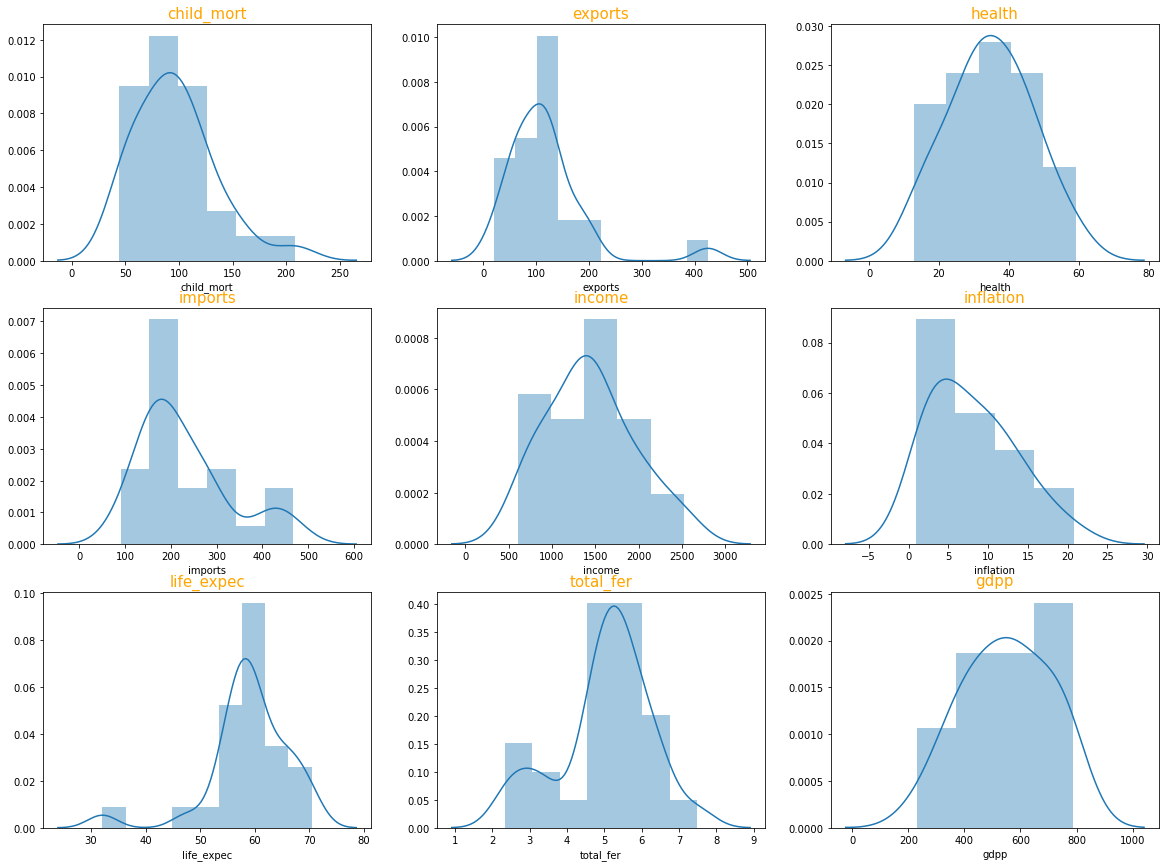

In [20]:
plt.figure(figsize=[20,20])
for i in enumerate(df_gdp.columns[1:]):
        plt.subplot(4,3,i[0]+1)
        sns.distplot(df_gdp[i[1]])
        plt.title(i[1],color='orange',fontsize=15)
plt.show()
        

### Observations:
<font color='Green'><br>
- It can be observed that Countries with Low GDPP
    - High Chid Mortality
    - Low Income
    - Total Fertility is also very high
    - Inflation is very less and import and exports are quiet less
    

### Analysis of Countries with Child Mortality more than 90

In [21]:
child_mort_high=Country[Country['child_mort']>90]

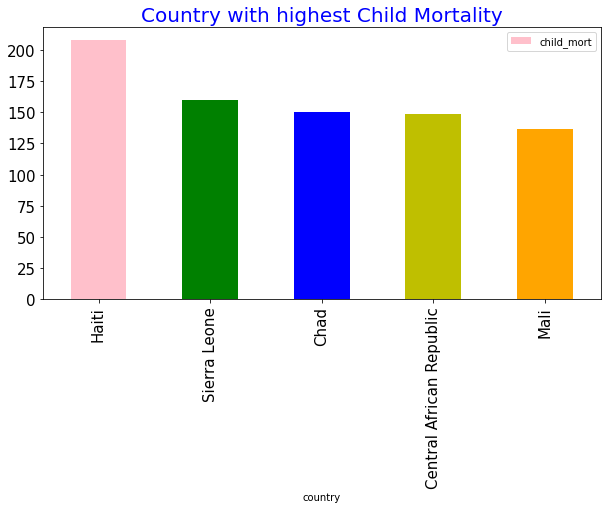

In [22]:

child_mort_high.sort_values(by='child_mort',ascending=False).head(5).plot(kind='bar',x='country',y='child_mort',color=['pink','g','b','y','orange'],title='Highest Child Mortality',fontsize='15',figsize=[10,5])
plt.title('Country with highest Child Mortality',color='b',fontsize=20)
plt.show()

### Observations:
<font color='green'><br>
- The Top 5 countries having Highest Child Mortality Rate are:
    - Haiti
    - Sierra Leone
    - Chad
    - Central African Republic
    - Mali

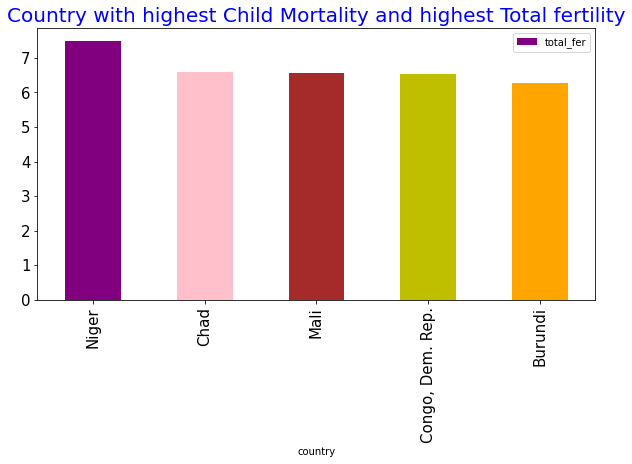

In [23]:
child_mort_high[child_mort_high['total_fer']>5].sort_values(by='total_fer',ascending=False).head(5).plot(kind='bar',x='country',y='total_fer',color=['purple','pink','brown','y','orange'],title='High Child Mortality and highest total fertility',fontsize='15',figsize=[10,5])
plt.title('Country with highest Child Mortality and highest Total fertility',color='b',fontsize=20)
plt.show()

### Obseravtions:
<font color='green'><br>
- The Coutries with High Child Mortality and Also having High Fertility are :
    - Niger
    - Chad
    - Mali
    - Congo.Dem.Republic
    - Burundi
- These countries required high focous as there is more need of aid during natural calamities

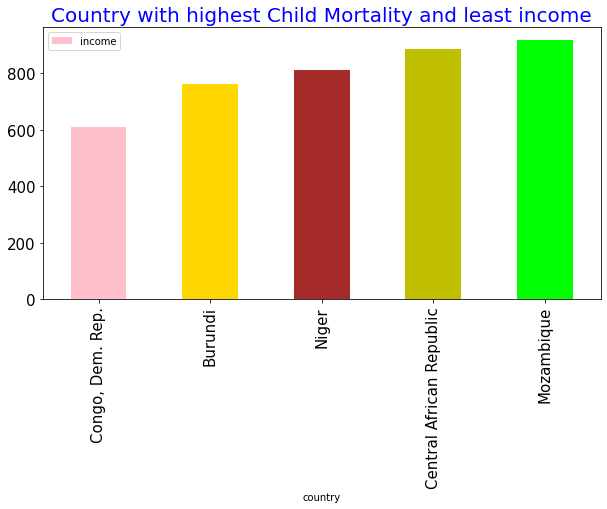

In [24]:
child_mort_high[child_mort_high['income']<1500].sort_values(by='income',ascending=True).head(5).plot(kind='bar',x='country',y='income',color=['pink','gold','brown','y','lime'],title='High Child Mortality and lowest Income',fontsize='15',figsize=[10,5])
plt.title('Country with highest Child Mortality and least income',color='b',fontsize=20)
plt.show()

### Observations:
<font color='Green'><br>
- The Countries with high Child Mortality and very low income are:
     - Congo.Demo.Rep
     - Burundi
     - Niger
     - Central African Republic
     - Mozambique

### Analysis on parameters like Child Mortality, GDPP, Income among countries with least GDPP

In [25]:
df_gdp.sort_values(by='gdpp',ascending=True).head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
26,Burundi,93.6,20.6052,26.7960,90.552,764,12.30,57.7,6.26,231
88,Liberia,89.3,62.4570,38.5860,302.802,700,5.47,60.8,5.02,327
37,"Congo, Dem. Rep.",116.0,137.2740,26.4194,165.664,609,20.80,57.5,6.54,334
112,Niger,123.0,77.2560,17.9568,170.868,814,2.55,58.8,7.49,348
132,Sierra Leone,160.0,67.0320,52.2690,137.655,1220,17.20,55.0,5.20,399
93,Madagascar,62.2,103.2500,15.5701,177.590,1390,8.79,60.8,4.60,413
106,Mozambique,101.0,131.9850,21.8299,193.578,918,7.64,54.5,5.56,419
31,Central African Republic,149.0,52.6280,17.7508,118.190,888,2.01,47.5,5.21,446
94,Malawi,90.5,104.6520,30.2481,160.191,1030,12.10,53.1,5.31,459
50,Eritrea,55.2,23.0878,12.8212,112.306,1420,11.60,61.7,4.61,482


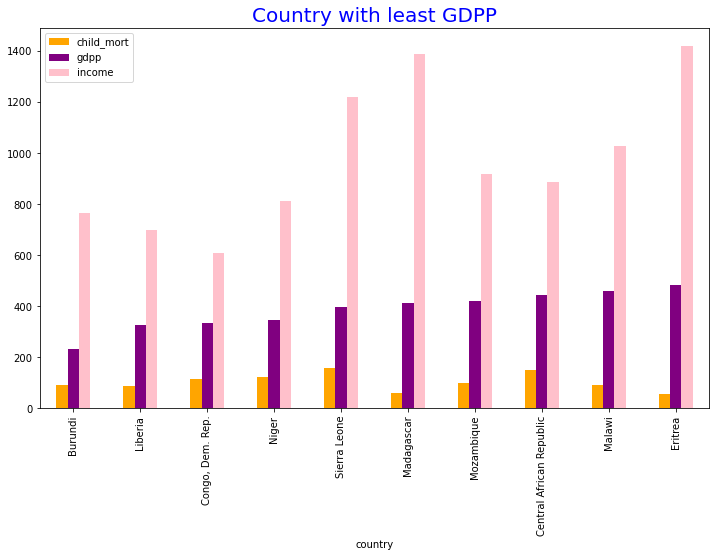

In [26]:
df_gdp.sort_values(by='gdpp',ascending=True).head(10).plot(kind='bar',x='country',y=['child_mort','gdpp','income'],figsize=[12,7]
                                                          ,color=['orange','purple','pink'])
plt.title('Country with least GDPP',color='b',fontsize=20)
plt.show()

### Observations:
<font color='green'><br>
- The Above plot contains the countries which has very low GDPP and among them rate of child mortality and income
    - It can be observed that Sierra Leone and Central African Republic has highest rate of Child Mortality.
    -  It can also be observed with  the least income is for Congo. Dem.Republic and Liberria which has also quiet high Child Mortality

### Analysis On Countries with Less Net Exports[Export-Import] and Child Mortality more than 130

In [27]:
Country_data['net_exprts']=Country_data['exports']-Country_data['imports']


In [28]:
Country_data[(Country_data['net_exprts']<0) & (Country_data['child_mort']>130)].sort_values(by='net_exprts',ascending=True)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,net_exprts
66,Haiti,208.0,15.3,6.91,64.7,1500,5.45,32.1,3.33,662,-49.4
132,Sierra Leone,160.0,16.8,13.10,34.5,1220,17.20,55.0,5.20,399,-17.7
31,Central African Republic,149.0,11.8,3.98,26.5,888,2.01,47.5,5.21,446,-14.7
97,Mali,137.0,22.8,4.98,35.1,1870,4.37,59.5,6.55,708,-12.3
32,Chad,150.0,36.8,4.53,43.5,1930,6.39,56.5,6.59,897,-6.7


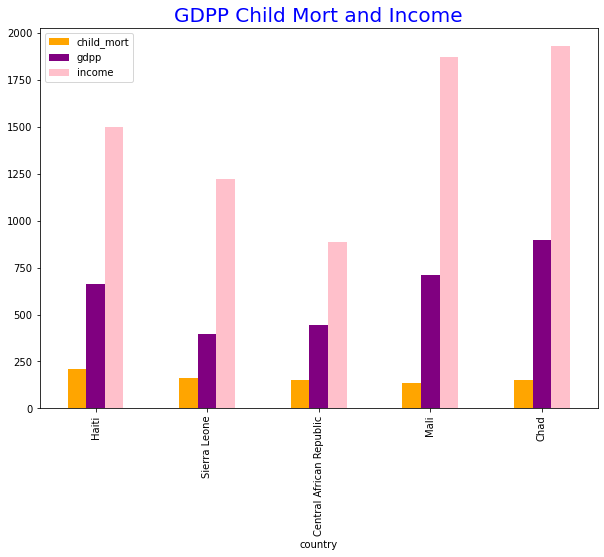

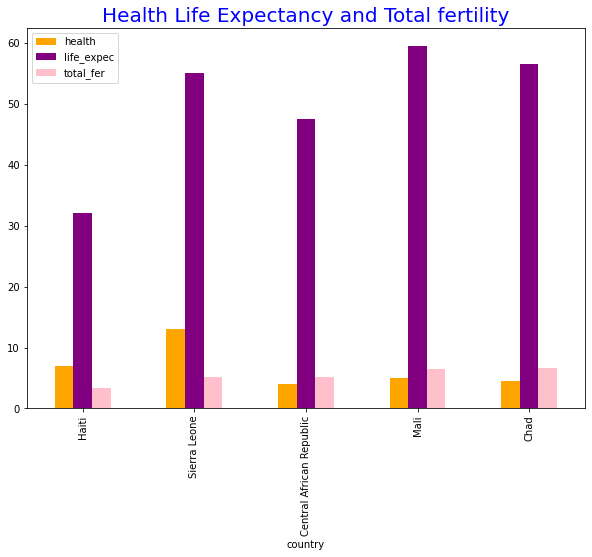

In [29]:
Country_data[(Country_data['net_exprts']<0) & (Country_data['child_mort']>130)].sort_values(by='net_exprts',ascending=True).plot(kind='bar',x='country',y=['child_mort','gdpp','income'],figsize=[10,7],color=['orange','purple','pink'])
plt.title('GDPP Child Mort and Income',color='b',fontsize=20)
plt.show()
Country_data[(Country_data['net_exprts']<0) & (Country_data['child_mort']>130)].sort_values(by='net_exprts',ascending=True).plot(kind='bar',x='country',y=['health','life_expec','total_fer'],figsize=[10,7],color=['orange','purple','pink'])
plt.title('Health Life Expectancy and Total fertility',color='b',fontsize=20)
plt.show()

### Observations:
<font color='Green'><br>
- The above plot is top countries who is having least net export(export - import) and child mortality more than 130.
    - It can be observed  the countries with less net exports also have less GDPP compare to other developed countries as well as less income. 
    - Hence these countries required are under developed and required more ttention during Natural Calamities.
    - Also can be observed that Haiti has very less life expectancy, health spending is very low. Total fertility is more as for Chad and Mali.

In [30]:
Country.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

## Data Preparation
## Handling Outliers

## Exports

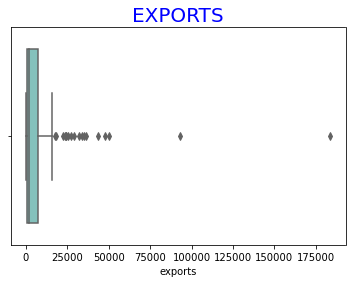

In [31]:
sns.boxplot(Country['exports'],palette="GnBu")
plt.title('EXPORTS',color='b',fontsize=20)
plt.show()

In [32]:
q1=Country.exports.quantile(0.99)

In [33]:
q1

64794.26000000014

In [34]:
Country['exports'][Country['exports']>=q1]=q1

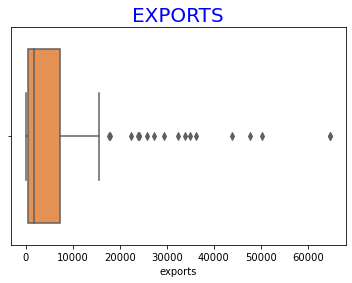

In [35]:
#After Handling Outliers
sns.boxplot(Country['exports'],palette="YlOrRd_r")
plt.title('EXPORTS',color='b',fontsize=20)
plt.show()

### Observations:
<font color='Green'><br>
- The exports is capped from the highest values to 0.99 percentile

## Imports

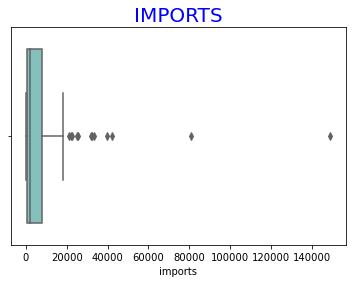

In [36]:
sns.boxplot(Country['imports'],palette="GnBu")
plt.title('IMPORTS',color='b',fontsize=20)
plt.show()

In [37]:
q1=Country['imports'].quantile(0.99)

In [38]:
Country['imports'][Country['imports']>=q1]=q1

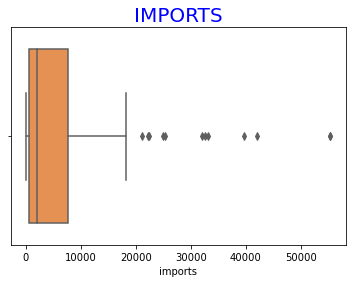

In [39]:
#After Handling Outliers
sns.boxplot(Country['imports'],palette="YlOrRd_r")
plt.title('IMPORTS',color='b',fontsize=20)
plt.show()

### Observations:
<font color='Green'><br>
- The Imports is capped from the highest values to 0.99 percentile

## Income

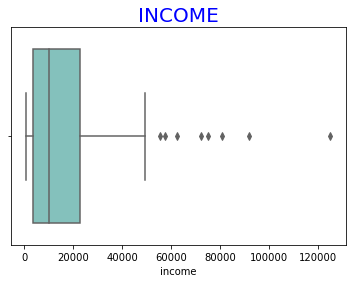

In [40]:
sns.boxplot(Country['income'],palette="GnBu")
plt.title('INCOME',color='b',fontsize=20)
plt.show()

In [41]:
Country['income'].quantile(0.99)

84374.00000000003

In [42]:
q1=Country['income'].quantile(0.99)

In [43]:
Country['income'][Country['income']>=q1]=q1

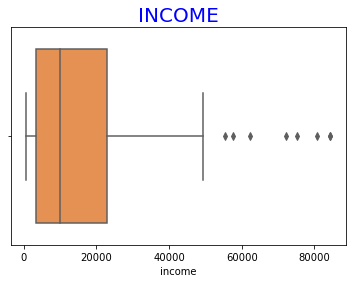

In [44]:
#After Handling Outliers
sns.boxplot(Country['income'],palette="YlOrRd_r")
plt.title('INCOME',color='b',fontsize=20)
plt.show()

### Observations:
<font color='Green'><br>
- The Income is capped from the highest values to 0.99 percentile

## Health

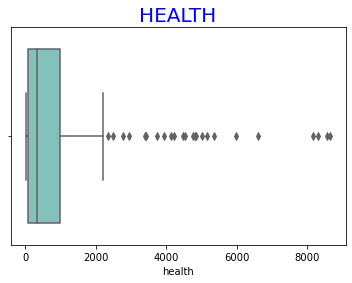

In [45]:
sns.boxplot(Country['health'],palette="GnBu")
plt.title('HEALTH',color='b',fontsize=20)
plt.show()

In [46]:
Country['health'].quantile(0.98)

7663.62000000001

In [47]:
q1=Country['health'].quantile(0.98)

In [48]:
Country['health'][Country['health']>=q1]=q1

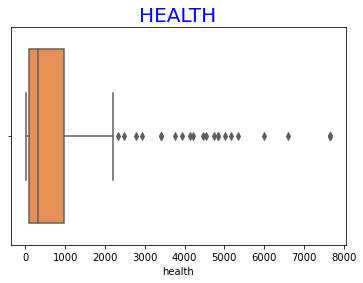

In [49]:
#After Handling Outliers
sns.boxplot(Country['health'],palette="YlOrRd_r")
plt.title('HEALTH',color='b',fontsize=20)
plt.show()

### Observations:
<font color='Green'><br>
- The health is capped from the highest values to 0.98 percentile

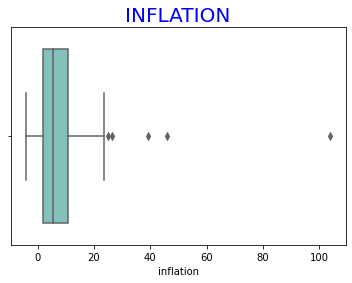

In [50]:
sns.boxplot(Country['inflation'],palette="GnBu")
plt.title('INFLATION',color='b',fontsize=20)
plt.show()

## Life_Expec


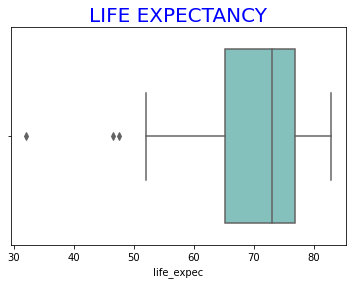

In [51]:
sns.boxplot(Country['life_expec'],palette="GnBu")
plt.title('LIFE EXPECTANCY',color='b',fontsize=20)
plt.show()

In [52]:
Country['life_expec'].quantile(0.01)

47.160000000000004

### Observations:
<font color='Green'><br>
Here it is not required ,Only few outlier which is having lowest life expetancy. it is required as the countrieswith low life expectancy required more attention. Keeping as it is.

## Total_Fer

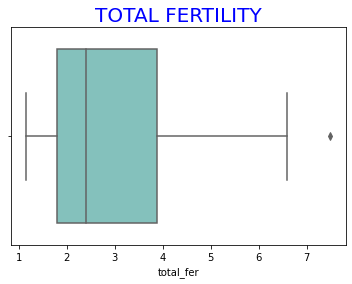

In [53]:
sns.boxplot(Country['total_fer'],palette="GnBu")
plt.title('TOTAL FERTILITY',color='b',fontsize=20)
plt.show()

In [54]:
Country['total_fer'].quantile(0.99)

6.563599999999999

### Observations:
<font color='Green'><br>
Here it is not required ,Only one outlier which is having highest total fertility. Kepeing as it is.

## GDPP

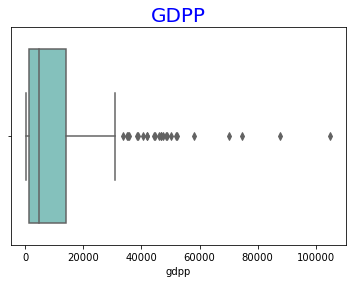

In [55]:
sns.boxplot(Country['gdpp'],palette="GnBu")
plt.title('GDPP',color='b',fontsize=20)
plt.show()

In [56]:
q1=Country['gdpp'].quantile(0.99)

In [57]:
q1

79088.00000000004

In [58]:
Country['gdpp'][Country['gdpp']>=q1]=q1

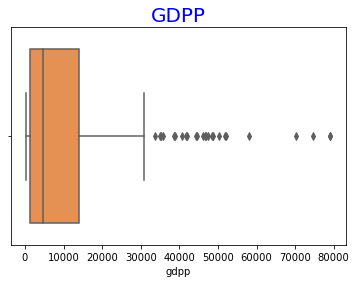

In [59]:
#After Handling Outliers
sns.boxplot(Country['gdpp'],palette="YlOrRd_r")
plt.title('GDPP',color='b',fontsize=20)
plt.show()

### Observations:
<font color='Green'><br>
- The GDPP is capped from the highest values to 0.99 percentile

## Hopkins Statistics

In [60]:
# Check the hopkins

#Calculating the Hopkins statistic
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [61]:
hopkins(Country.drop('country',axis=1))

0.9781010758788662

### Observations:
<font color='Green'><br>
- The Hopkins is nearly to 1, and more than 0.90 which implies tht dtaa isgood for clustering.

## Making Clusters 


### Scaling the parameters 

In [62]:
#Standardising the data parameters using Standard Scaler
scaler=StandardScaler()
Country_scaled=scaler.fit_transform(Country.drop(['country'],axis=1))

In [63]:
Country_scaled=pd.DataFrame(Country_scaled)
Country_scaled.columns=['child_mort', 'exports', 'health', 'imports', 'income','inflation', 'life_expec', 'total_fer', 'gdpp']

## Modelling

## Finding The Optimal Number

### SILHOUETTE SCORE

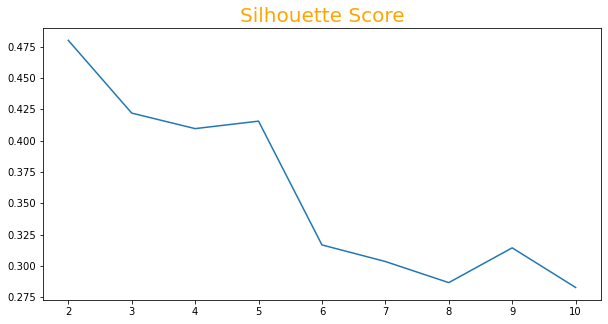

In [64]:
#Plotting the Silhouette Score For each cluster.
plt.figure(figsize=[10,5])
ss=[]
for k in range(2,11):
    kmean=KMeans(n_clusters=k).fit(Country_scaled)
    ss.append([k,silhouette_score(Country_scaled,kmean.labels_)])

temp=pd.DataFrame(ss)    
plt.plot(temp[0],temp[1])
plt.title('Silhouette Score',color='Orange',fontsize=20)
plt.show()

### Observations:
<font color='Green'><br>
- It can be observed that Silhouette Score is maximum for value 3 which indicates that we K can be choosen as 3 for Clustering 

In [65]:
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(Country_scaled)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(Country_scaled, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.47994104905681456
For n_clusters=3, the silhouette score is 0.4218969014370761
For n_clusters=4, the silhouette score is 0.40916382370372417
For n_clusters=5, the silhouette score is 0.4154799162336913
For n_clusters=6, the silhouette score is 0.3136431676419031
For n_clusters=7, the silhouette score is 0.2886276737783288
For n_clusters=8, the silhouette score is 0.2871996378333045


### ELBOW( Cut Off Point)

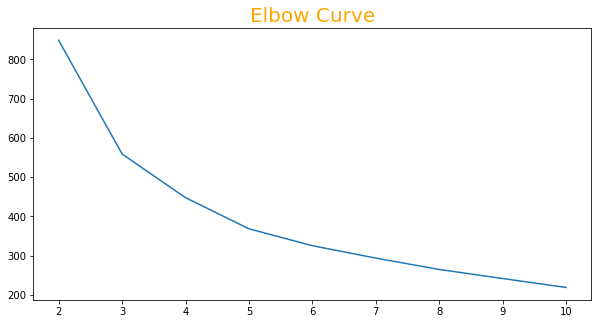

In [66]:
#Elbow plot to visulaize the best the cut off.
plt.figure(figsize=[10,5])
ssd=[]
for k in range(2,11):
    kmean=KMeans(n_clusters=k).fit(Country_scaled)
    ssd.append([k,kmean.inertia_])
temp=pd.DataFrame(ssd)
plt.plot(temp[0],temp[1])
plt.title('Elbow Curve',color='Orange',fontsize=20)
plt.show()

### Observations:
<font color='Green'><br>
- It can be observed that The steep slope or depth is at point 3 , which indicated , K-Clustering can be done using K as 3.

# K=3

In [67]:
#K means Algorithm 
kmean=KMeans(n_clusters=3,random_state=50)
kmean.fit(Country_scaled)
kmean.labels_

array([0, 1, 1, 0, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 0, 1, 1, 1, 0,
       1, 2, 1, 0, 0, 1, 0, 2, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 2, 1,
       2, 1, 1, 1, 1, 0, 0, 1, 1, 2, 2, 0, 0, 1, 2, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 2, 1, 1, 1, 0, 2, 1, 2, 1, 2, 1, 1, 0, 0, 2, 1, 0, 1, 1, 0,
       0, 1, 1, 2, 1, 0, 0, 1, 1, 0, 2, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       2, 2, 0, 0, 2, 1, 0, 1, 1, 1, 1, 1, 1, 2, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 2, 1, 2, 0, 0, 1, 2, 1, 1, 0, 1, 2, 2, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 2, 2, 2, 1, 1, 1, 1, 1, 0, 0])

In [68]:
Country.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0


In [69]:
#Concatenating tha label with data 
df_kmean=Country_scaled.copy()
label=pd.DataFrame(kmean.labels_,columns=['label'])
df_kmean=pd.concat([df_kmean,label],axis=1)
df_kmean=pd.concat([df_kmean,Country['country']],axis=1)

#Concatenating with original data
df_kmean_org=Country.copy()
label=pd.DataFrame(kmean.labels_,columns=['label'])
df_kmean_org=pd.concat([df_kmean_org,label],axis=1)


In [70]:
df_kmean.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,label,country
0,1.291532,-0.569622,-0.578451,-0.598741,-0.851668,0.157336,-1.619092,1.902882,-0.702259,0,Afghanistan
1,-0.538949,-0.473858,-0.447266,-0.413584,-0.386946,-0.312347,0.647866,-0.859973,-0.498726,1,Albania
2,-0.272833,-0.424000,-0.494818,-0.476100,-0.221053,0.789274,0.670423,-0.038404,-0.477434,1,Algeria
3,2.007808,-0.381249,-0.544381,-0.463973,-0.612045,1.387054,-1.179234,2.128151,-0.530950,0,Angola
4,-0.695634,-0.086742,-0.175718,0.139728,0.125254,-0.601749,0.704258,-0.541946,-0.032042,1,Antigua and Barbuda


In [71]:
df_kmean_org.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,label
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0,0
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0,1
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0,1
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0,0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0,1


In [72]:
df_kmean.label.value_counts()

1    90
0    48
2    29
Name: label, dtype: int64

### Observations:
<font color='Green'><br>
- Cluster 0- have 90 countries
- Cluster 1- have 48 countries
- cluster 2- have 29 countries

### Plotting the GDPP, INCOME and CHILD_MORT scatter plot

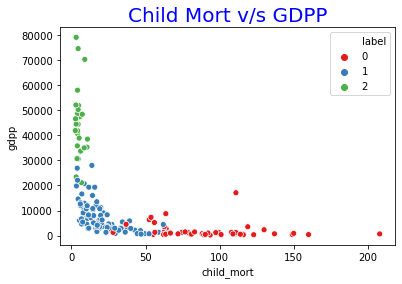

In [73]:
#child_mort vs gdpp
sns.scatterplot(data=df_kmean_org,x='child_mort',y='gdpp',hue='label',palette='Set1')
plt.title('Child Mort v/s GDPP',color='b',fontsize=20)
plt.show()

### Observations:
<font color='Green'><br>
- It can be seen that as Child mortaltiy increases , the gdpp for  red colored cluster is getting decresed and it is very low.
- The cluster with green color is having very low child mortalit rate , having high GDP.
- The cluster with blue is having moderate where GDP is moderately high and child mortality is however low.

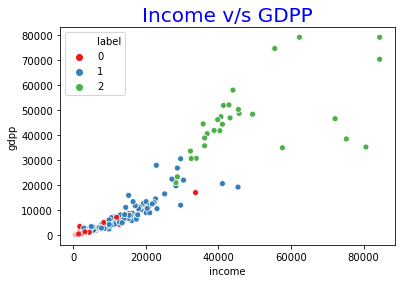

In [74]:
#income vs gdpp
sns.scatterplot(data=df_kmean_org,x='income',y='gdpp',hue='label',palette='Set1')
plt.title('Income v/s GDPP',color='b',fontsize=20)
plt.show()

### Observations:
<font color='Green'><br>
- In the Above scatter plot,it can be observed that Cluster green where income is high , the gdpp is also high.
- In Blue color cluster , the income is moderately high and GDP is accordingly the same
- whereas red cluster, the income is very low and same with gdpp

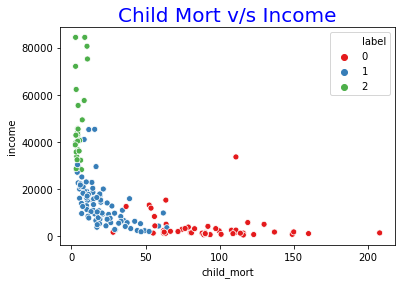

In [75]:
#child_mort vs income
sns.scatterplot(data=df_kmean_org,x='child_mort',y='income',hue='label',palette='Set1')
plt.title('Child Mort v/s Income',color='b',fontsize=20)
plt.show()

### Observations:
<font color='Green'><br>
- It can be observed from above plot that , Where income is more that is green cluster, child mortality is not  there.
- Whereas in red cluster , as child mortality increases , income per GDP is then very low.

In [76]:
#Cluster profiling


In [77]:
df_kmean.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,label,country
0,1.291532,-0.569622,-0.578451,-0.598741,-0.851668,0.157336,-1.619092,1.902882,-0.702259,0,Afghanistan
1,-0.538949,-0.473858,-0.447266,-0.413584,-0.386946,-0.312347,0.647866,-0.859973,-0.498726,1,Albania
2,-0.272833,-0.424000,-0.494818,-0.476100,-0.221053,0.789274,0.670423,-0.038404,-0.477434,1,Algeria
3,2.007808,-0.381249,-0.544381,-0.463973,-0.612045,1.387054,-1.179234,2.128151,-0.530950,0,Angola
4,-0.695634,-0.086742,-0.175718,0.139728,0.125254,-0.601749,0.704258,-0.541946,-0.032042,1,Antigua and Barbuda


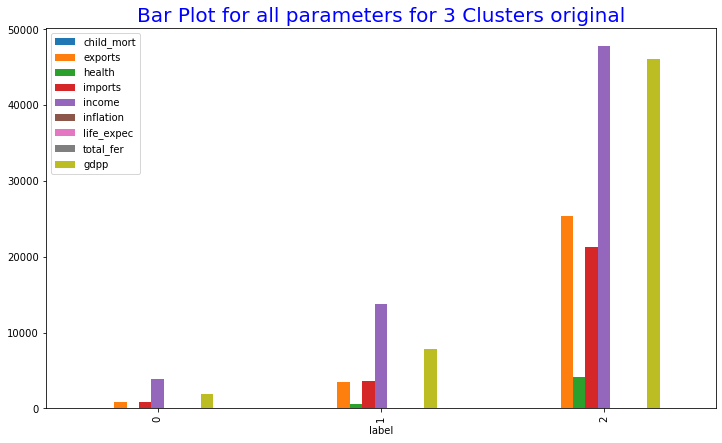

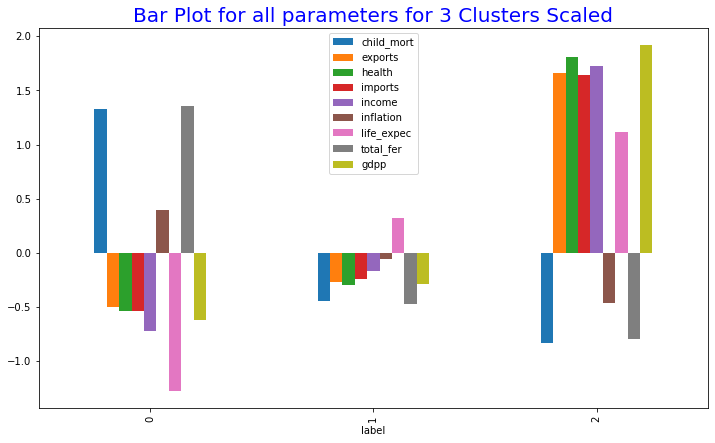

In [78]:
#all parameters in each clusters 

df1=df_kmean_org.drop('country',axis=1).groupby('label').mean().plot(kind='bar',figsize=[12,7])
plt.title('Bar Plot for all parameters for 3 Clusters original',color='b',fontsize=20)
plt.show()
df1=df_kmean.drop('country',axis=1).groupby('label').mean().plot(kind='bar',figsize=[12,7])
plt.title('Bar Plot for all parameters for 3 Clusters Scaled',color='b',fontsize=20)
plt.show()



### Obserations:
<font color = 'Red'>
- It can be observed that for cluster 0 , The Child mortality , total ferility and inflation is high , wheras other important factors like gdpp, income, exports, imports, lif expectancy , health is verry low.<br>
- This means cluster 0 required high attention during calamities. Te countries belonging to this group require dires aid.
<font color='Green'><br>
- It can be observed for cluster 2 , that gdpp , health, exports, income, life expectancy , imports, are high and also it can be seen that child mortality , total fertility is very low.<br>
- This means countries under this cluster are well devleoped and required less help and aid during calamaities.


In [79]:
df_kmean.columns

Index(['child_mort', 'exports', 'health', 'imports', 'income', 'inflation',
       'life_expec', 'total_fer', 'gdpp', 'label', 'country'],
      dtype='object')

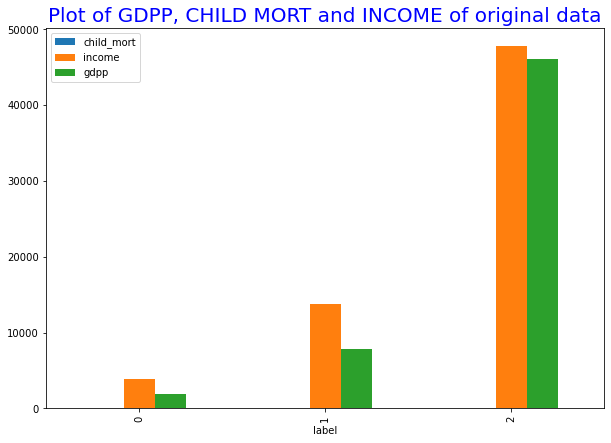

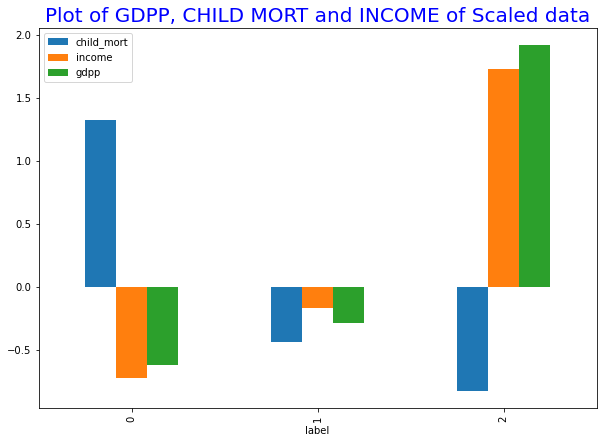

In [80]:
#Graph of GDPP , INCOME and CHILD MORTALITY in each CLUSTERS
df_kmean_org.drop(['health','exports','imports','inflation', 'life_expec','total_fer','country'],axis=1).groupby('label').mean().plot(kind='bar',figsize=[10,7])
plt.title('Plot of GDPP, CHILD MORT and INCOME of original data',color='b',fontsize=20)
plt.show()
df_kmean.drop(['health','exports','imports','inflation', 'life_expec','total_fer','country'],axis=1).groupby('label').mean().plot(kind='bar',figsize=[10,7])
plt.title('Plot of GDPP, CHILD MORT and INCOME of Scaled data',color='b',fontsize=20)
plt.show()


### Observations:
<font color='Green'><br>
- Above bar plot of GDPP, CHILD_MORT and INCOME.
- It can be observed that cluster 0 has low income and low gdpp but child mortality is very high. 
- This indicates that the countries belong to this cluster are under developed and in need of attention more focus during natural calamities. 

- Also it can been seen that luster 1 has low income and low gdpp too but compare to cluster 0 it is not that low. Also child mortality is very low. This can be conidered as developing countries.

- Cluster 2 as very high income and gdppand very low child mortality. The countries belowngs to ths cluster are well developed.

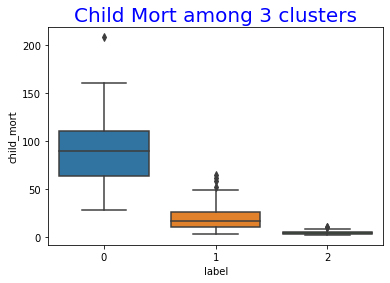

In [81]:
sns.boxplot(df_kmean_org['label'],df_kmean_org['child_mort'])
plt.title('Child Mort among 3 clusters',color='b',fontsize=20)
plt.show()

### Observations:
<font color='green'><br>
- It can be observed that ,the cluster 0 has very high child  mortality rate

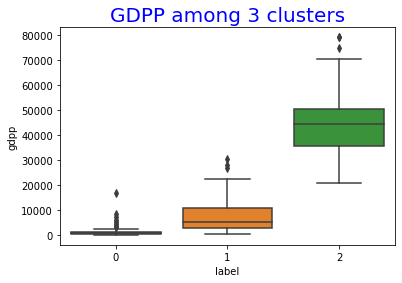

In [82]:
sns.boxplot(df_kmean_org['label'],df_kmean_org['gdpp'])
plt.title('GDPP among 3 clusters',color='b',fontsize=20)
plt.show()

### Observations:
<font color='green'><br>
- It cna be observed that gdpp is very low for clutster 0 compare to other clusters.

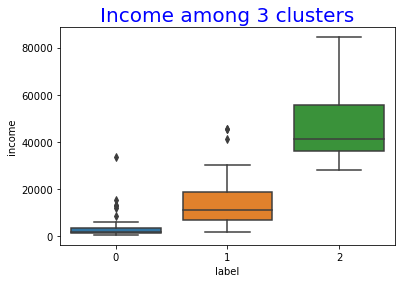

In [83]:
sns.boxplot(df_kmean_org['label'],df_kmean_org['income'])
plt.title('Income among 3 clusters',color='b',fontsize=20)
plt.show()

### Observatons:
<font color='green'><br>
- It can be observed that for cluster 0 , it has very low income compare to other clusters

In [84]:
#First five rows of cluster zero which is under developed countries that is cluster 0
df_kmean_org[df_kmean_org['label']==0].head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,label
0,Afghanistan,90.2,55.300,41.9174,248.297,1610.0,9.440,56.2,5.82,553.0,0
3,Angola,119.0,2199.190,100.6050,1514.370,5900.0,22.400,60.1,6.16,3530.0,0
17,Benin,111.0,180.404,31.0780,281.976,1820.0,0.885,61.8,5.36,758.0,0
21,Botswana,52.5,2768.600,527.0500,3257.550,13300.0,8.920,57.1,2.88,6350.0,0
25,Burkina Faso,116.0,110.400,38.7550,170.200,1430.0,6.810,57.9,5.87,575.0,0


In [85]:
#The countries which is having very high mortality rate
df_kmean_org[df_kmean['label']==0].sort_values(by=['income','child_mort','gdpp'],ascending=[True,False,True]).head(5)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,label
37,"Congo, Dem. Rep.",116.0,137.2740,26.4194,165.664,609.0,20.80,57.5,6.54,334.0,0
88,Liberia,89.3,62.4570,38.5860,302.802,700.0,5.47,60.8,5.02,327.0,0
26,Burundi,93.6,20.6052,26.7960,90.552,764.0,12.30,57.7,6.26,231.0,0
112,Niger,123.0,77.2560,17.9568,170.868,814.0,2.55,58.8,7.49,348.0,0
31,Central African Republic,149.0,52.6280,17.7508,118.190,888.0,2.01,47.5,5.21,446.0,0


In [86]:
#The countries which is having very high mortality rate
df_kmean_org[df_kmean_org['label']==0].sort_values(by=['child_mort','income','gdpp'],ascending=[False,True,True]).head(5)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,label
66,Haiti,208.0,101.286,45.7442,428.314,1500.0,5.45,32.1,3.33,662.0,0
132,Sierra Leone,160.0,67.032,52.2690,137.655,1220.0,17.20,55.0,5.20,399.0,0
32,Chad,150.0,330.096,40.6341,390.195,1930.0,6.39,56.5,6.59,897.0,0
31,Central African Republic,149.0,52.628,17.7508,118.190,888.0,2.01,47.5,5.21,446.0,0
97,Mali,137.0,161.424,35.2584,248.508,1870.0,4.37,59.5,6.55,708.0,0


In [87]:
#The countries which is having very high mortality rate
df_kmean_org[df_kmean['label']==0].sort_values(by=['gdpp','income','child_mort'],ascending=[True,True,False]).head(5)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,label
26,Burundi,93.6,20.6052,26.7960,90.552,764.0,12.30,57.7,6.26,231.0,0
88,Liberia,89.3,62.4570,38.5860,302.802,700.0,5.47,60.8,5.02,327.0,0
37,"Congo, Dem. Rep.",116.0,137.2740,26.4194,165.664,609.0,20.80,57.5,6.54,334.0,0
112,Niger,123.0,77.2560,17.9568,170.868,814.0,2.55,58.8,7.49,348.0,0
132,Sierra Leone,160.0,67.0320,52.2690,137.655,1220.0,17.20,55.0,5.20,399.0,0


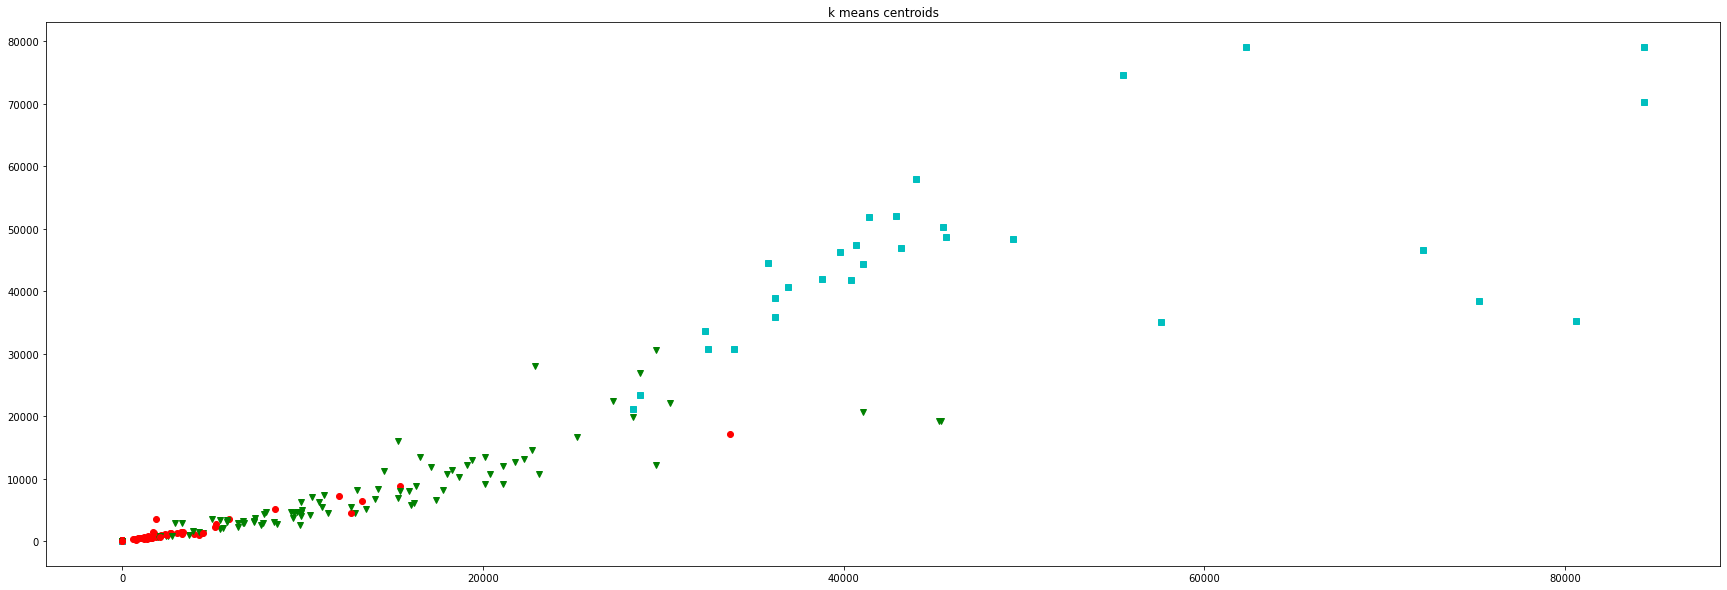

In [88]:
plt.figure(figsize=[30,10])
colors = ['r', 'g', 'c']
markers = ['o', 'v', 's']
centers = np.array(kmean.cluster_centers_)
plt.plot()
plt.title('k means centroids')
for i, l in enumerate(kmean.labels_):
    plt.plot(Country['income'][i],Country['gdpp'][i],Country['child_mort'][i], color=colors[l], marker=markers[l],ls='None')


### Obseravtions:
<font color='Green'><br>
- The above plot shows the scatter plot of 3 clusters with respect to child mortality , GDPP and income.


### With Euclidean Distance of parameters  GDPP, INCOME and CHILD MORTALITY  from centroid

In [89]:
# A data frame having the parameter GDPP, INCOME and CHILD MORTALITY 
df=df_kmean_org[['child_mort','income','gdpp','label']]
df=df[df['label']==0]
df.reset_index(inplace=True)

In [90]:
#Euclidean Distance of gdpp,income and child_mort from centroid
ED=[]
for i in range(len(df)):
    dis=math.sqrt((centers[:,0][0]-df['child_mort'][i])**2+(centers[:,4][0]-df['income'][i])**2+(centers[:,8][0]-df['gdpp'][i])**2)
    ED.append(dis)
df.head()

,index,child_mort,income,gdpp,label
0,0,90.2,1610.0,553.0,0
1,3,119.0,5900.0,3530.0,0
2,17,111.0,1820.0,758.0,0
3,21,52.5,13300.0,6350.0,0
4,25,116.0,1430.0,575.0,0


In [91]:
list_m=['health','life_expec','total_fer','country']

In [92]:
c=df_kmean_org[df_kmean_org['label']==0][list_m]
c.reset_index(inplace=True)
c.drop('index',axis=1)

ED=pd.DataFrame(ED,columns=['ED'])
df=pd.concat([df,c],axis=1)
df=pd.concat([df,ED],axis=1)

In [93]:
df=df.drop('index',axis=1)

In [94]:
#TOP 5 countries using K-CLustering Algorithm which required more focus during natural calamities
df.sort_values(by='ED',ascending=True).head(20)

,child_mort,income,gdpp,label,health,life_expec,total_fer,country,ED
10,116.0,609.0,334.0,0,26.4194,57.5,6.54,"Congo, Dem. Rep.",704.901833
26,89.3,700.0,327.0,0,38.5860,60.8,5.02,Liberia,778.518424
5,93.6,764.0,231.0,0,26.7960,57.7,6.26,Burundi,804.342469
33,123.0,814.0,348.0,0,17.9568,58.8,7.49,Niger,894.493321
7,149.0,888.0,446.0,0,17.7508,47.5,5.21,Central African Republic,1005.540055
31,101.0,918.0,419.0,0,21.8299,54.5,5.56,Mozambique,1014.925063
28,90.5,1030.0,459.0,0,30.2481,53.1,5.31,Malawi,1132.076889
38,160.0,1220.0,399.0,0,52.2690,55.0,5.20,Sierra Leone,1294.234759
44,90.3,1210.0,488.0,0,37.3320,58.7,4.87,Togo,1308.633740
18,109.0,1190.0,648.0,0,31.9464,58.0,5.34,Guinea,1360.194969


### Observations:
<font color='green'><br>
- From the Eucledian Distance , measure for GDPP , income and Child Mort from Centroid, above list of countries which has near to it.

- The parameters like low inome . low gdpp , high child mortality , life expectancy low, total fertiltiy more and health spending is less.
- From above with different parameters that can be observed following countries required actions during  Natural calamaties.
    - Congo, Dem. Rep.
    - Niger
    - Central Africa Republic
    - Sierra Leone
    -  Haiti



## Hierarichal Clustering 

In [95]:
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [96]:
Country.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0


### Single linkage

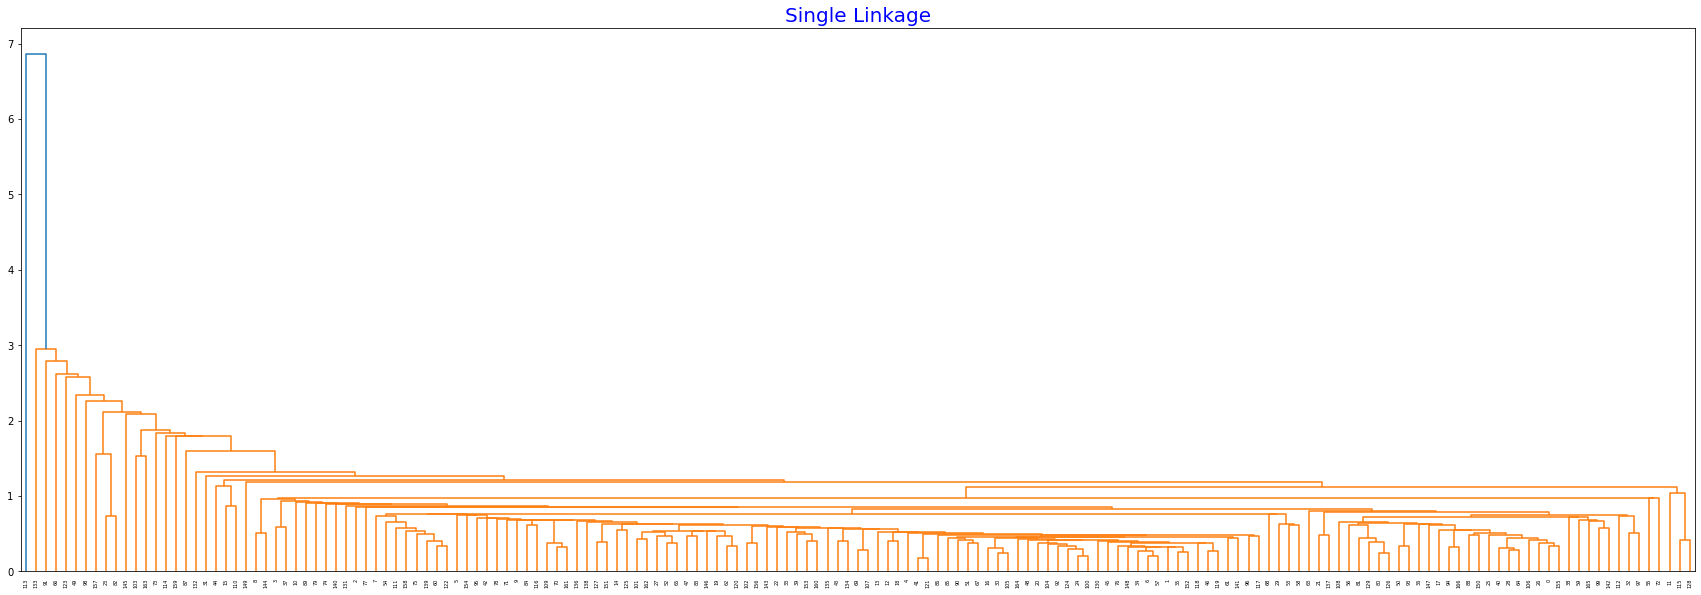

In [98]:
plt.figure(figsize=[30,10])
mergings=linkage(Country_scaled,method='single',metric='euclidean')
dendrogram(mergings)
plt.title('Single Linkage',fontsize=20,color='b')
plt.show()

### Observations:
<font color='Green'><br>
- Asit can be observed from the above plot , It is very difficult to analyse and cluster the countries into diifernt groups. 

### Complete Linkage

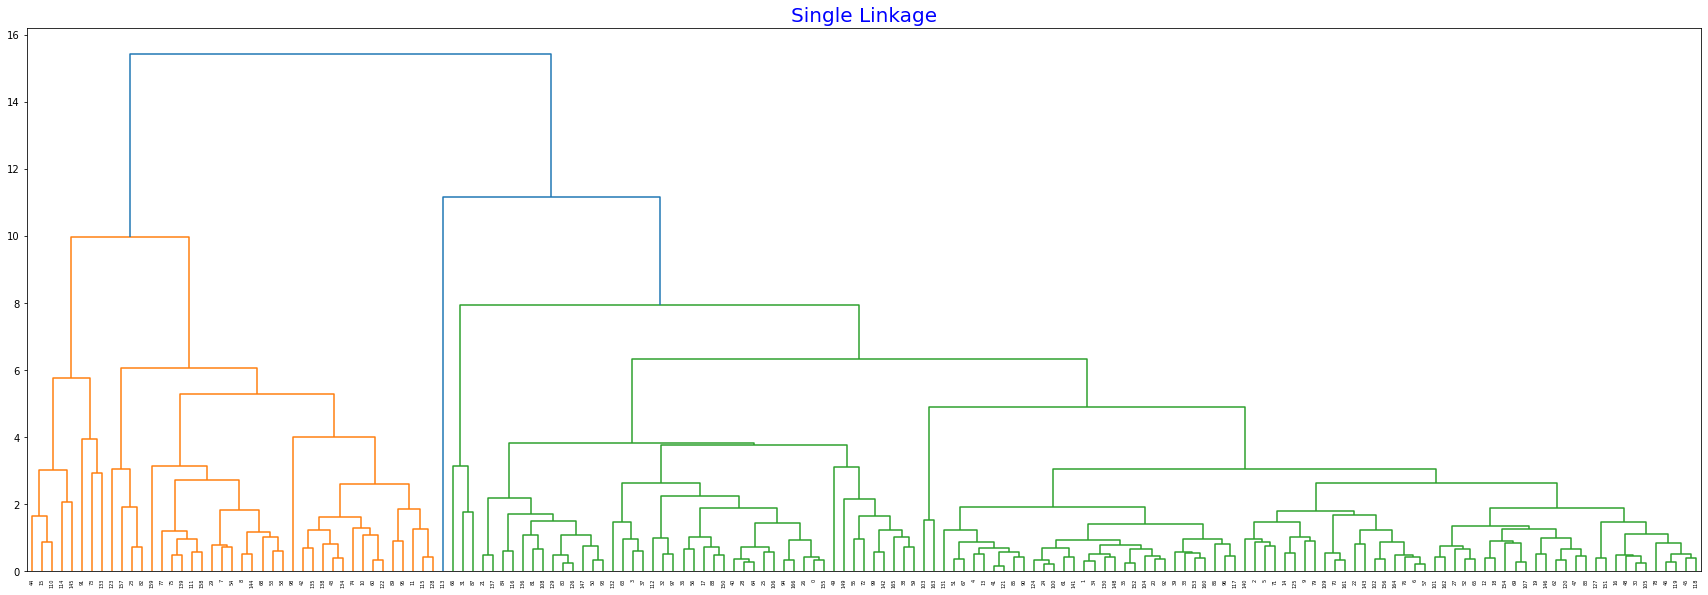

In [99]:
plt.figure(figsize=[30,10])
mergings=linkage(Country_scaled,method='complete',metric='euclidean')
dendrogram(mergings)
plt.title('Single Linkage',fontsize=20,color='b')
plt.show()

### Observations:
<font color='Green'><br>
- It can be seen from the baove plot which as three cluster. 
- The countries can be divided into 3 differnet clusters
- orange , blue and green are highlighted 3 clusters

In [100]:
#With cluster number as 3 , we use cut tree to dra a line which make 3 cluster for denrogram and reshaping it into numpy array 
cluster_label=cut_tree(mergings,n_clusters=3).reshape(-1,)

In [101]:
cluster_label

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 2, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0])

In [102]:
Country.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0


In [103]:
#df_hie data frame and concatenated with cluster label correspondes to each country
df_hie=Country_scaled.copy()
cluster_label=pd.DataFrame(cluster_label)
df_hie=pd.concat([df_hie,cluster_label],axis=1)
#With original Data
df_hie_org=Country.copy()
cluster_label=pd.DataFrame(cluster_label)
df_hie_org=pd.concat([df_hie_org,cluster_label],axis=1)

In [104]:
#naming the columns
df_hie.columns=['child_mort','exports','health','imports','income','inflation','life_expec','total_fer','gdpp','cluster_label']

In [105]:
df_hie_org.columns=['country','child_mort','exports','health','imports','income','inflation','life_expec','total_fer','gdpp','cluster_label']

In [106]:
df_hie_org['cluster_label'].value_counts()

0    125
1     41
2      1
Name: cluster_label, dtype: int64

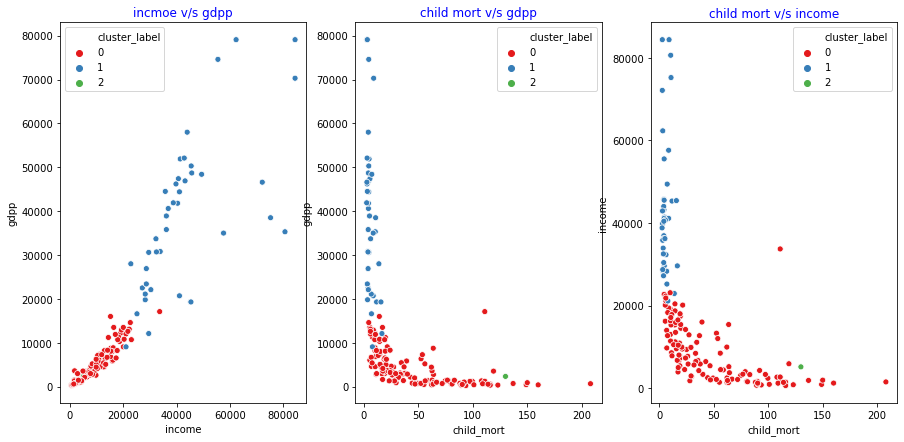

In [107]:
plt.figure(figsize=[15,7])
plt.subplot(1,3,1)
sns.scatterplot(data=df_hie_org,x='income',y='gdpp',hue='cluster_label',palette='Set1')
plt.title('incmoe v/s gdpp',color='b')
plt.subplot(1,3,2)
sns.scatterplot(data=df_hie_org,x='child_mort',y='gdpp',hue='cluster_label',palette='Set1')
plt.title('child mort v/s gdpp',color='b')
plt.subplot(1,3,3)
sns.scatterplot(data=df_hie_org,x='child_mort',y='income',hue='cluster_label',palette='Set1')
plt.title('child mort v/s income',color='b')
plt.show()


### Observations:
<font color ='Green'>
- It canbe seen that cluster 0 and cluter 1 are majorily occupied and cluster 2 has only one country.

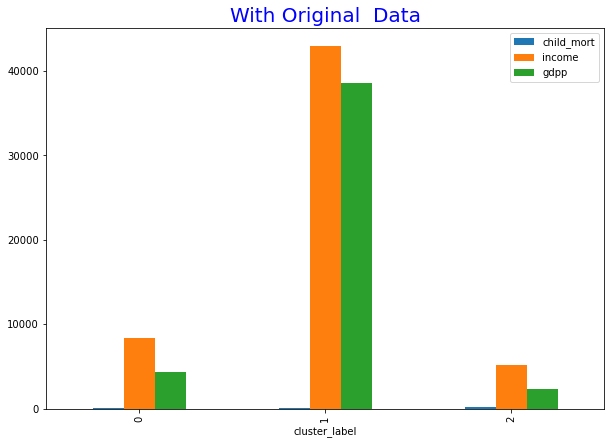

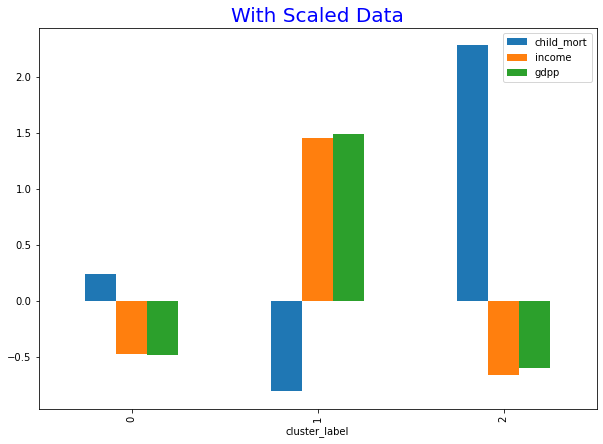

In [108]:
df_hie_org.drop(['health', 'imports','exports' ,'inflation', 'life_expec','total_fer'],axis=1).groupby('cluster_label').mean().plot(kind='bar',figsize=[10,7])
plt.title('With Original  Data',color='b',fontsize=20)
plt.show()
df_hie.drop(['health', 'imports','exports' ,'inflation', 'life_expec','total_fer'],axis=1).groupby('cluster_label').mean().plot(kind='bar',figsize=[10,7])
plt.title('With Scaled Data',color='b',fontsize=20)
plt.show()


### Observations:
<font color='Green'><br>
From the above plots it can be seen , The cluster 2 which is have high child mortality and low income and gdpp is only one country. 

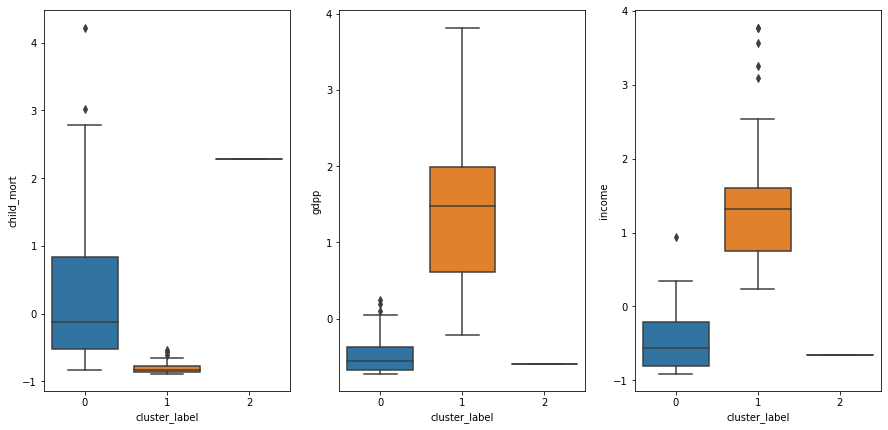

In [109]:
plt.figure(figsize=[15,7])
plt.subplot(1,3,1)
sns.boxplot(df_hie_org['cluster_label'],df_hie['child_mort'])
plt.subplot(1,3,2)
sns.boxplot(df_hie_org['cluster_label'],df_hie['gdpp'])
plt.subplot(1,3,3)
sns.boxplot(df_hie_org['cluster_label'],df_hie['income'])

plt.show()

### Observations:
<font color='green'><br>
- From the plots it can be seen , Comparative to other clusters,The cluster 2 which is have high child mortality and low income and low GDPP

In [110]:
df_hie_org[df_hie_org['cluster_label']==2]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_label
113,Nigeria,130.0,589.49,118.131,405.42,5150.0,104.0,60.5,5.84,2330.0,2


## Inferences:
<font color='Green'><br>
From the Both the Clustering Technques, Using K -CLustering and Hierarchal CLustering , The Following 5 COuntries which required more attentions and are on priority are :

- Central Africa Republic:- The Child mortality is very high and GDPP and Income is very low. Total fertility is also high and health spending is very low.
    
- Niger :- Niger has very low gdpp and low income and also bery high mortality, also total fertility rate is also high. Health Spending is very low.
    
- Congo, Dem. Rep. : It has very least GDPP and income. Health spending is very low and total fertility rate is also high.
    
- Haiti it has very low gdpp and also quiet low income and child mortality is high , life expectancy is also very low. Health spending is very low.
    
- Sierra Leone :- in Sierra leone, The child mortality is highest and gdpp is very low.




### Central Africa Republic	      
- child_mort	149
- income	888
- gdpp	446
- health	17.7508
- life_expec	47.5
- total_fer	5.21

### Niger	
- child_mort	123
- income	814
- gdpp	348
- health	17.9568
- life_expec	58.8
- total_fer	7.49

### Congo, Dem. Rep.	
- child_mort	116
- income	609
- gdpp	334
- health	26.4194
- life_expec	57.5
- total_fer	6.54

### Haiti	
- child_mort	208
- income	1500
- gdpp	662
- health	45.7442
- life_expec	32.1
- total_fer	3.33


### Sierra Leone	
- child_mort	160
- income	1220
- gdpp	399
- health	52.269
- life_expec	55
- total_fer	5.2

